## 환경변수 로드

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

# 7-38

In [2]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import pandas as pd 

# Titanic 데이터셋을 GitHub에서 직접 로드
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
df = pd.read_csv(url)

# OpenAI의 ChatGPT 모델을 초기화
llm = ChatOpenAI(temperature=0, model="gpt-4o-mini")

# Pandas DataFrame을 처리할 수 있는 LangChain 에이전트를 생성
pandas_agent = create_pandas_dataframe_agent(
    llm,  # 초기화된 언어 모델
    df,   # 분석할 DataFrame
    agent_type="openai-tools",  # OpenAI의 도구를 사용하는 에이전트 유형 지정
    verbose=False,              # 상세한 출력 비활성화
    return_intermediate_steps=True,  # 에이전트의 중간 처리 단계 결과 반환 설정
    allow_dangerous_code=True,       # 잠재적으로 위험할 수 있는 코드 실행 허용
)

# 생성된 에이전트 객체를 출력
pandas_agent

AgentExecutor(verbose=False, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_to_openai_tool_messages(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typi

# 7-39

In [3]:
from pprint import pprint 

# Pandas 에이전트를 사용한 기본 정보 확인
result = pandas_agent.invoke("데이터셋의 행과 열의 수를 알려주세요.")
pprint(result)

{'input': '데이터셋의 행과 열의 수를 알려주세요.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': 'df.shape'}, log="\nInvoking: `python_repl_ast` with `{'query': 'df.shape'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_roc6Z2rPmyK9InSmaDxWdG5A', 'function': {'arguments': '{"query":"df.shape"}', 'name': 'python_repl_ast'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_482c22a7bc'}, id='run-a089ad4b-90b0-4cba-96cc-b0019eff45ff', tool_calls=[{'name': 'python_repl_ast', 'args': {'query': 'df.shape'}, 'id': 'call_roc6Z2rPmyK9InSmaDxWdG5A', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'python_repl_ast', 'args': '{"query":"df.shape"}', 'id': 'call_roc6Z2rPmyK9InSmaDxWdG5A', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_roc6Z2rPmyK9InSmaDxWdG5A'),
                         (891, 12))],
 'output': '

# 7-40

In [4]:
# 생존자 수 계산
result = pandas_agent.invoke("생존자의 수를 계산해주세요.")
pprint(result)

{'input': '생존자의 수를 계산해주세요.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "survivors_count = df['Survived'].sum() \nsurvivors_count"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "survivors_count = df[\'Survived\'].sum() \\nsurvivors_count"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_BgmS1MVQpyJ5c3awT5dBC4X5', 'function': {'arguments': '{"query":"survivors_count = df[\'Survived\'].sum() \\nsurvivors_count"}', 'name': 'python_repl_ast'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_482c22a7bc'}, id='run-ebce2896-aa0d-4cd7-aea5-18474fe93755', tool_calls=[{'name': 'python_repl_ast', 'args': {'query': "survivors_count = df['Survived'].sum() \nsurvivors_count"}, 'id': 'call_BgmS1MVQpyJ5c3awT5dBC4X5', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'python_repl_ast', 'args': '{"query"

# 7-41

In [4]:
# LangChain의 실험적 기능에서 PythonREPL 유틸리티를 임포트
from langchain_experimental.utilities import PythonREPL

# PythonREPL 객체를 초기화
python_repl = PythonREPL()

# 생성된 PythonREPL 객체를 출력
python_repl

PythonREPL(globals={}, locals={})

# 7-42

In [6]:
# Python REPL 도구 실행 
result = python_repl.run("print(2+10)")

print(result)

Python REPL can execute arbitrary code. Use with caution.


12



# 7-43

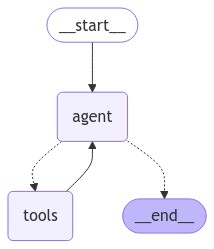

In [5]:
from langchain_core.tools import Tool
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from IPython.display import Image, display

# Pandas 도구 생성
pandas_tool = Tool(
    name="pandas_agent",
    func=pandas_agent.invoke,
    description="""타이타닉 데이터가 저장된 데이터프레임 df에 대한 조작 도구. 
    데이터 분석, 필터링, 그룹화 등의 작업에 사용합니다."""
)

# Python REPL 도구 생성
python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    func=python_repl.run,
    description="""Python 명령을 실행하는 Python 셸. 
    복잡한 계산이나 pandas_agent로 처리하기 어려운 작업에 사용합니다."""
)

# 도구 목록 생성
tools = [pandas_tool, repl_tool]

# LLM 모델 인스턴스를 생성
model = ChatOpenAI(model="gpt-4o-mini")

# 시스템 프롬프트 정의 
prompt = """
타이타닉 데이터셋을 분석하는 데이터 과학자 도우미입니다. 
답변에 대한 추론 과정과 근거에 대해서 설명하고 최종 답변을 출력합니다.
"""

# LLM에 도구 바인딩하여 ReAct 에이전트 생성 
agent = create_react_agent(model, tools=tools, state_modifier=prompt)

# 에이전트 그래프 구조를 시각화 
display(Image(agent.get_graph().draw_mermaid_png()))

# 7-44

In [27]:
# 입력 값 정의 
inputs = {"messages": [("user", "데이터셋의 행과 열의 수를 알려주세요.")]}

# 에이전트의 응답을 스트리밍 방식으로 출력  
config = {"recursion_limit": 10}  
for s in agent.stream(inputs, config=config, stream_mode="values"):
    message = s["messages"][-1]
    if isinstance(message, tuple):
        print(message)
    else:
        message.pretty_print()

================================ Human Message =================================

데이터셋의 행과 열의 수를 알려주세요.
================================== Ai Message ==================================
Tool Calls:
  pandas_agent (call_yZQkXP8Kfewck877DIw3RiVd)
 Call ID: call_yZQkXP8Kfewck877DIw3RiVd
  Args:
    __arg1: df.shape
================================= Tool Message =================================
Name: pandas_agent

{'input': 'df.shape', 'output': 'The shape of the dataframe `df` is (891, 12), which means it has 891 rows and 12 columns.', 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': 'df.shape'}, log="\nInvoking: `python_repl_ast` with `{'query': 'df.shape'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_nk8PWsTKI5TEL2UPvvr6u1n6', 'function': {'arguments': '{"query":"df.shape"}', 'name': 'python_repl_ast'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 

# 7-45

In [28]:
# 입력 값 정의 
inputs = {
    "messages": [
        ("user", "생존자의 수와 생존율을 계산해주세요."),
        ("user", "생존율은 소수점 둘째 자리까지 표시해주세요.")
        ]
    }

# 에이전트의 응답을 스트리밍 방식으로 출력  
config = {"recursion_limit": 10}  
for s in agent.stream(inputs, config=config, stream_mode="values"):
    message = s["messages"][-1]
    if isinstance(message, tuple):
        print(message)
    else:
        message.pretty_print()

================================ Human Message =================================

생존율은 소수점 둘째 자리까지 표시해주세요.
================================== Ai Message ==================================
Tool Calls:
  pandas_agent (call_IOnPF6HxxMjxxxKZk5ptQtDG)
 Call ID: call_IOnPF6HxxMjxxxKZk5ptQtDG
  Args:
    __arg1: df['Survived'].sum()
  pandas_agent (call_WXbVOujBupK9kJ7Ca92IJ8Dd)
 Call ID: call_WXbVOujBupK9kJ7Ca92IJ8Dd
  Args:
    __arg1: len(df)
================================= Tool Message =================================
Name: pandas_agent

{'input': 'len(df)', 'output': 'The length of the dataframe `df` is 891, meaning it contains 891 rows.', 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': 'len(df)'}, log="\nInvoking: `python_repl_ast` with `{'query': 'len(df)'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_CMGuwjxBEIDRilcqXCXPLEns', 'function': {'arguments': '{"query":"len(df)"}', 'name': 

# 7-46

In [29]:
# 입력 값 정의 
inputs = {
    "messages": [
        ("user", "각 승객 클래스(Pclass)별 생존율을 계산하고,"),
        ("user", "어떤 클래스의 생존율이 가장 높은지 분석해주세요.")
        ]
    }

# 에이전트의 응답을 스트리밍 방식으로 출력  
config = {"recursion_limit": 10}  
for s in agent.stream(inputs, config=config, stream_mode="values"):
    message = s["messages"][-1]
    if isinstance(message, tuple):
        print(message)
    else:
        message.pretty_print()

================================ Human Message =================================

어떤 클래스의 생존율이 가장 높은지 분석해주세요.
================================== Ai Message ==================================
Tool Calls:
  pandas_agent (call_bfHbJyBP82HwmbspiGewpFps)
 Call ID: call_bfHbJyBP82HwmbspiGewpFps
  Args:
    __arg1: df.groupby('Pclass')['Survived'].mean()
================================= Tool Message =================================
Name: pandas_agent

{'input': "df.groupby('Pclass')['Survived'].mean()", 'output': 'The mean survival rates by passenger class (Pclass) are as follows:\n\n- Pclass 1: 0.629630 (approximately 63%)\n- Pclass 2: 0.472826 (approximately 47%)\n- Pclass 3: 0.242363 (approximately 24%)', 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "df.groupby('Pclass')['Survived'].mean()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "df.groupby(\'Pclass\')[\'Survived\'].mean()"}`\n\n\n', message_log=[AIMessageChunk(content='', additiona

# 7-47

================================ Human Message =================================

막대 그래프를 사용하고, x축은 Pclass, y축은 생존율로 설정해주세요.
================================== Ai Message ==================================
Tool Calls:
  pandas_agent (call_m3kWTwuU9Lb8QSCtp8eoJGl9)
 Call ID: call_m3kWTwuU9Lb8QSCtp8eoJGl9
  Args:
    __arg1: import seaborn as sns
import matplotlib.pyplot as plt

# 생존율 계산
survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=survival_rate, palette='viridis')
plt.title('Pclass별 생존율')
plt.xlabel('Pclass')
plt.ylabel('생존율')
plt.ylim(0, 1)
plt.show()


<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/Users/steve2/Library/Caches/pypoetry/virtualenvs/langchain-book-AlsLlHcI-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/steve2/Library/Caches/pypoetry/virtualenvs/langchain-book-AlsLlHcI-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/steve2/Library/Caches/pypoetry/virtualenvs/langchain-book-AlsLlHcI-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

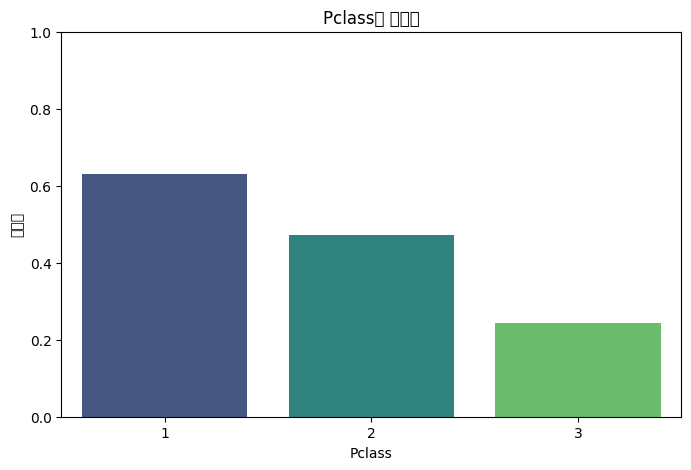

================================= Tool Message =================================
Name: pandas_agent

{'input': "import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# 생존율 계산\nsurvival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()\n\n# 막대 그래프 그리기\nplt.figure(figsize=(8, 5))\nsns.barplot(x='Pclass', y='Survived', data=survival_rate, palette='viridis')\nplt.title('Pclass별 생존율')\nplt.xlabel('Pclass')\nplt.ylabel('생존율')\nplt.ylim(0, 1)\nplt.show()", 'output': 'The code you provided calculates the survival rate based on passenger class (Pclass) and then visualizes it using a bar plot. The plot shows the average survival rate for each class, with the y-axis ranging from 0 to 1. \n\nIf you have any specific questions or need further assistance with this code or its output, feel free to ask!', 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# 생존율 계산\nsurvival_rate = df.groupby('Pc

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 값 정의 
inputs = {
    "messages": [
        ("user", "seaborn을 사용하여 승객 클래스(Pclass)별 생존율을 시각화해주세요."),
        ("user", "막대 그래프를 사용하고, x축은 Pclass, y축은 생존율로 설정해주세요."),
        ]
    }

# 에이전트의 응답을 스트리밍 방식으로 출력  
config = {"recursion_limit": 10}  
for s in agent.stream(inputs, config=config, stream_mode="values"):
    message = s["messages"][-1]
    if isinstance(message, tuple):
        print(message)
    else:
        message.pretty_print()

# 7-48

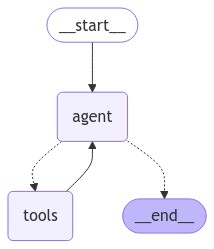

In [137]:
# Tool 정의
repl_tool = Tool(
    name="python_repl_with_visualization",
    func=python_repl.run,
    description="""Python 명령을 실행하고 시각화하는 도구입니다. 
    복잡한 계산, pandas로 처리하기 어려운 작업, 
    또는 데이터 시각화에 사용합니다. 
    Matplotlib이나 Seaborn을 사용한 시각화 코드를 실행하면 이미지가 생성됩니다."""
)

# 도구 목록 생성
tools = [pandas_tool, repl_tool]

# LLM 모델 인스턴스 생성
model = ChatOpenAI(model="gpt-4o-mini")

# 시스템 프롬프트 정의 
prompt = """
데이터셋을 분석하는 데이터 과학자 도우미입니다. 
데이터를 가져오는 작업과 분석 작업은 pandas_agent 도구를 사용합니다. 
파이썬 코드 실행과 시각화 작업은 python_repl_with_visualization 도구를 사용합니다. 
답변에 대한 추론 과정과 근거에 대해서 설명하고 최종 답변을 출력합니다.
"""

# LLM에 도구 바인딩하여 ReAct 에이전트 생성 
agent = create_react_agent(model, tools=tools, state_modifier=prompt)

# 에이전트 그래프 구조를 시각화 
display(Image(agent.get_graph().draw_mermaid_png()))

# 7-49

================================ Human Message =================================

막대 그래프를 사용하고, x축은 Pclass, y축은 생존율로 설정해주세요.
================================== Ai Message ==================================
Tool Calls:
  pandas_agent (call_7DivpmL6f98Mb2nq2BxLvHbW)
 Call ID: call_7DivpmL6f98Mb2nq2BxLvHbW
  Args:
    __arg1: df.groupby('Pclass')['Survived'].mean()
================================= Tool Message =================================
Name: pandas_agent

{'input': "df.groupby('Pclass')['Survived'].mean()", 'output': 'The mean survival rates by passenger class (Pclass) are as follows:\n\n- Pclass 1: 0.629630 (approximately 63%)\n- Pclass 2: 0.472826 (approximately 47%)\n- Pclass 3: 0.244353 (approximately 24%)', 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "df.groupby('Pclass')['Survived'].mean()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "df.groupby(\'Pclass\')[\'Survived\'].mean()"}`\n\n\n', message_log=[AIMessageChunk(conten

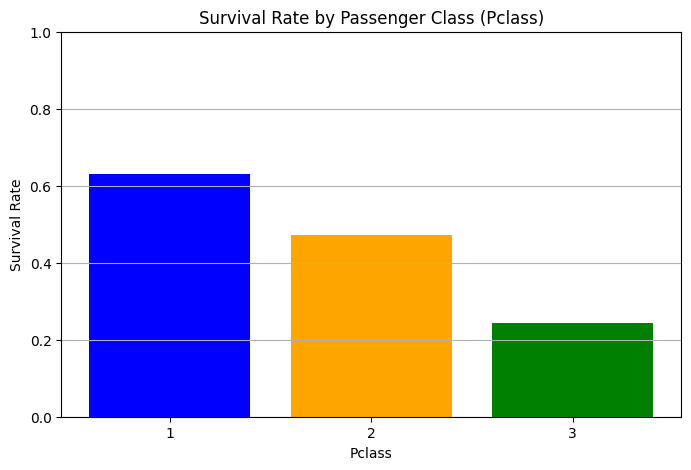

================================== Ai Message ==================================
Tool Calls:
  python_repl_with_visualization (call_4cqJgqFOGoOccG2XfNTXoKXI)
 Call ID: call_4cqJgqFOGoOccG2XfNTXoKXI
  Args:
    __arg1: import matplotlib.pyplot as plt
import pandas as pd

# 생존율 데이터
pclass_survival_rates = {1: 0.629630, 2: 0.472826, 3: 0.244353}

# 데이터프레임으로 변환
survival_df = pd.DataFrame(list(pclass_survival_rates.items()), columns=['Pclass', 'Survival Rate'])

# 막대 그래프 생성
plt.figure(figsize=(8, 5))
plt.bar(survival_df['Pclass'], survival_df['Survival Rate'], color=['blue', 'orange', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class (Pclass)')
plt.xticks(survival_df['Pclass'])
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
================================= Tool Message =================================
Name: python_repl_with_visualization


================================== Ai Message ==================================

생존율을 클래스(Pclass)별로

In [138]:
# 입력 값 정의 
inputs = {
    "messages": [
        ("user", "승객 클래스(Pclass)별 생존율을 시각화해주세요."),
        ("user", "막대 그래프를 사용하고, x축은 Pclass, y축은 생존율로 설정해주세요."),
        ]
    }

# 에이전트의 응답을 스트리밍 방식으로 출력  
config = {"recursion_limit": 10}  
for s in agent.stream(inputs, config=config, stream_mode="values"):
    message = s["messages"][-1]
    if isinstance(message, tuple):
        print(message)
    else:
        message.pretty_print()

# 7-50

In [139]:
# 에이전트의 대화 메시지 목록을 출력 
s["messages"]

[HumanMessage(content='승객 클래스(Pclass)별 생존율을 시각화해주세요.', additional_kwargs={}, response_metadata={}, id='07beca6b-ef62-4c13-b696-d3a998b03aba'),
 HumanMessage(content='막대 그래프를 사용하고, x축은 Pclass, y축은 생존율로 설정해주세요.', additional_kwargs={}, response_metadata={}, id='8a8080b6-f187-40b5-9bf1-5173d948447a'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7DivpmL6f98Mb2nq2BxLvHbW', 'function': {'arguments': '{"__arg1":"df.groupby(\'Pclass\')[\'Survived\'].mean()"}', 'name': 'pandas_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 289, 'total_tokens': 317, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_482c22a7bc', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ae3a4447-779a-4e50-9025-d7925b06f196-0', tool_calls=[{'name': 'pandas_agent', 'args': {'__arg1': "df.groupby('P

# 7-51

In [141]:
# 에이전트의 도구 호출 내역을 확인 
s["messages"][-3].tool_calls

[{'name': 'python_repl_with_visualization',
  'args': {'__arg1': "import matplotlib.pyplot as plt\nimport pandas as pd\n\n# 생존율 데이터\npclass_survival_rates = {1: 0.629630, 2: 0.472826, 3: 0.244353}\n\n# 데이터프레임으로 변환\nsurvival_df = pd.DataFrame(list(pclass_survival_rates.items()), columns=['Pclass', 'Survival Rate'])\n\n# 막대 그래프 생성\nplt.figure(figsize=(8, 5))\nplt.bar(survival_df['Pclass'], survival_df['Survival Rate'], color=['blue', 'orange', 'green'])\nplt.xlabel('Pclass')\nplt.ylabel('Survival Rate')\nplt.title('Survival Rate by Passenger Class (Pclass)')\nplt.xticks(survival_df['Pclass'])\nplt.ylim(0, 1)\nplt.grid(axis='y')\nplt.show()"},
  'id': 'call_4cqJgqFOGoOccG2XfNTXoKXI',
  'type': 'tool_call'}]

# 7-52

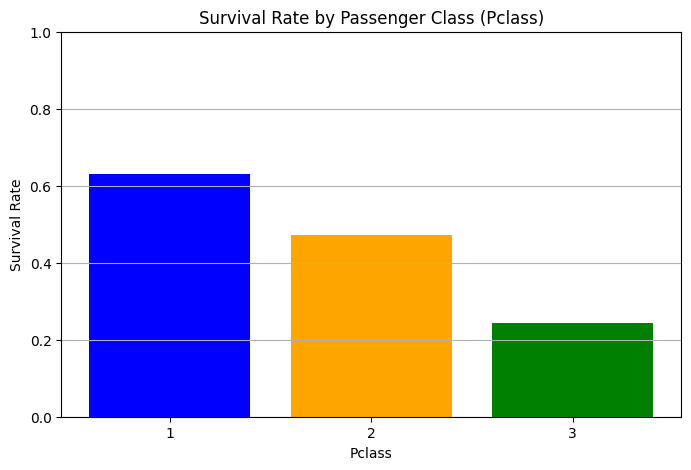

ToolMessage(content='', name='python_repl_with_visualization', tool_call_id='call_4cqJgqFOGoOccG2XfNTXoKXI')

In [142]:
# 도구 호출 내역을 입력하여 도구 실행 
repl_tool.invoke(s["messages"][-3].tool_calls[0])